# DECISION TREE on auctions dataset

## Problem statement

* The file auctions.csv contains information on 1972 auctions that transacted on eBay.com during May–June 2004.
* The goal is to use these data to build a model that will classify auctions as competitive or noncompetitive.
* A competitive auction is defined as an auction with at least two bids placed on the item auctioned. * The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close).
* In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive.
* Build a classification model to predict if an auction will be competitive or not
* Identify the important variables that impact the prediction

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("AUCTION.csv")
df.columns

FileNotFoundError: File b'AUCTION.csv' does not exist

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669.0,Male,3,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468.0,Male,58,1,0,Yes,Private,Urban,255.00,39.2,never smoked,1
2,56543.0,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,NaN,Female,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
4,41413.0,Female,75,0,1,Yes,Self-employed,Rural,103.00,27.0,never smoked,0


In [238]:
df['Diff']=df['OpenPrice']-df['ClosePrice']

In [239]:
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive,Diff
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0


In [240]:
df.isnull().sum()

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive     0
Diff            0
dtype: int64

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 9 columns):
Category        1972 non-null object
currency        1972 non-null object
sellerRating    1972 non-null int64
Duration        1972 non-null int64
endDay          1972 non-null object
ClosePrice      1972 non-null float64
OpenPrice       1972 non-null float64
Competitive     1972 non-null int64
Diff            1972 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 138.7+ KB


In [242]:
df.nunique()

Category         18
currency          3
sellerRating    461
Duration          5
endDay            7
ClosePrice      827
OpenPrice       291
Competitive       2
Diff            781
dtype: int64

In [243]:
df['Competitive'].value_counts()

1    1066
0     906
Name: Competitive, dtype: int64

In [244]:
df['Competitive'].value_counts(normalize=True)*100

1    54.056795
0    45.943205
Name: Competitive, dtype: float64

In [245]:
df.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive,Diff
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568,-23.522819
std,5973.011033,2.052906,89.493858,38.856149,0.498478,78.752786
min,0.000000,1.000000,0.010000,0.010000,0.000000,-961.010000
25%,595.000000,5.000000,4.907500,1.230000,0.000000,-12.290000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000,-0.760000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000,0.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000,0.000000


In [246]:
x = df.drop(["Competitive"], axis=1)
y = df[['Competitive']]
print(x.shape)
print(y.shape)

(1972, 8)
(1972, 1)


In [247]:
x=pd.get_dummies(x)

In [248]:
x.columns

Index(['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice', 'Diff',
       'Category_Antique/Art/Craft', 'Category_Automotive', 'Category_Books',
       'Category_Business/Industrial', 'Category_Clothing/Accessories',
       'Category_Coins/Stamps', 'Category_Collectibles', 'Category_Computer',
       'Category_Electronics', 'Category_EverythingElse',
       'Category_Health/Beauty', 'Category_Home/Garden', 'Category_Jewelry',
       'Category_Music/Movie/Game', 'Category_Photography',
       'Category_Pottery/Glass', 'Category_SportingGoods',
       'Category_Toys/Hobbies', 'currency_EUR', 'currency_GBP', 'currency_US',
       'endDay_Fri', 'endDay_Mon', 'endDay_Sat', 'endDay_Sun', 'endDay_Thu',
       'endDay_Tue', 'endDay_Wed'],
      dtype='object')

In [249]:
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

In [250]:
X_train.shape,X_test.shape

((1380, 33), (592, 33))

In [251]:
model_gini=DecisionTreeClassifier()

In [252]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [253]:
preds_gini = model_gini.predict(X_test)

In [254]:
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)
print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[251   9]
 [ 12 320]]


In [255]:
print(accuracy_score(y_test,preds_gini))

0.964527027027027


In [256]:
print(accuracy_score(y_test,preds_gini))

0.964527027027027


In [257]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [258]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [259]:
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [260]:
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)
print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[250  10]
 [ 12 320]]


In [261]:
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))

0.9628378378378378
0.9920289855072464


In [262]:
print(metrics.classification_report(y_test,preds_entropy))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96       260
          1       0.97      0.96      0.97       332

avg / total       0.96      0.96      0.96       592



In [263]:
from sklearn.metrics import classification_report,confusion_matrix
mat_entropy = confusion_matrix(y_test,preds_entropy)
print("confusion matrix = \n",mat_entropy)

confusion matrix = 
 [[250  10]
 [ 12 320]]


In [264]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [265]:
feature_cols = x.columns

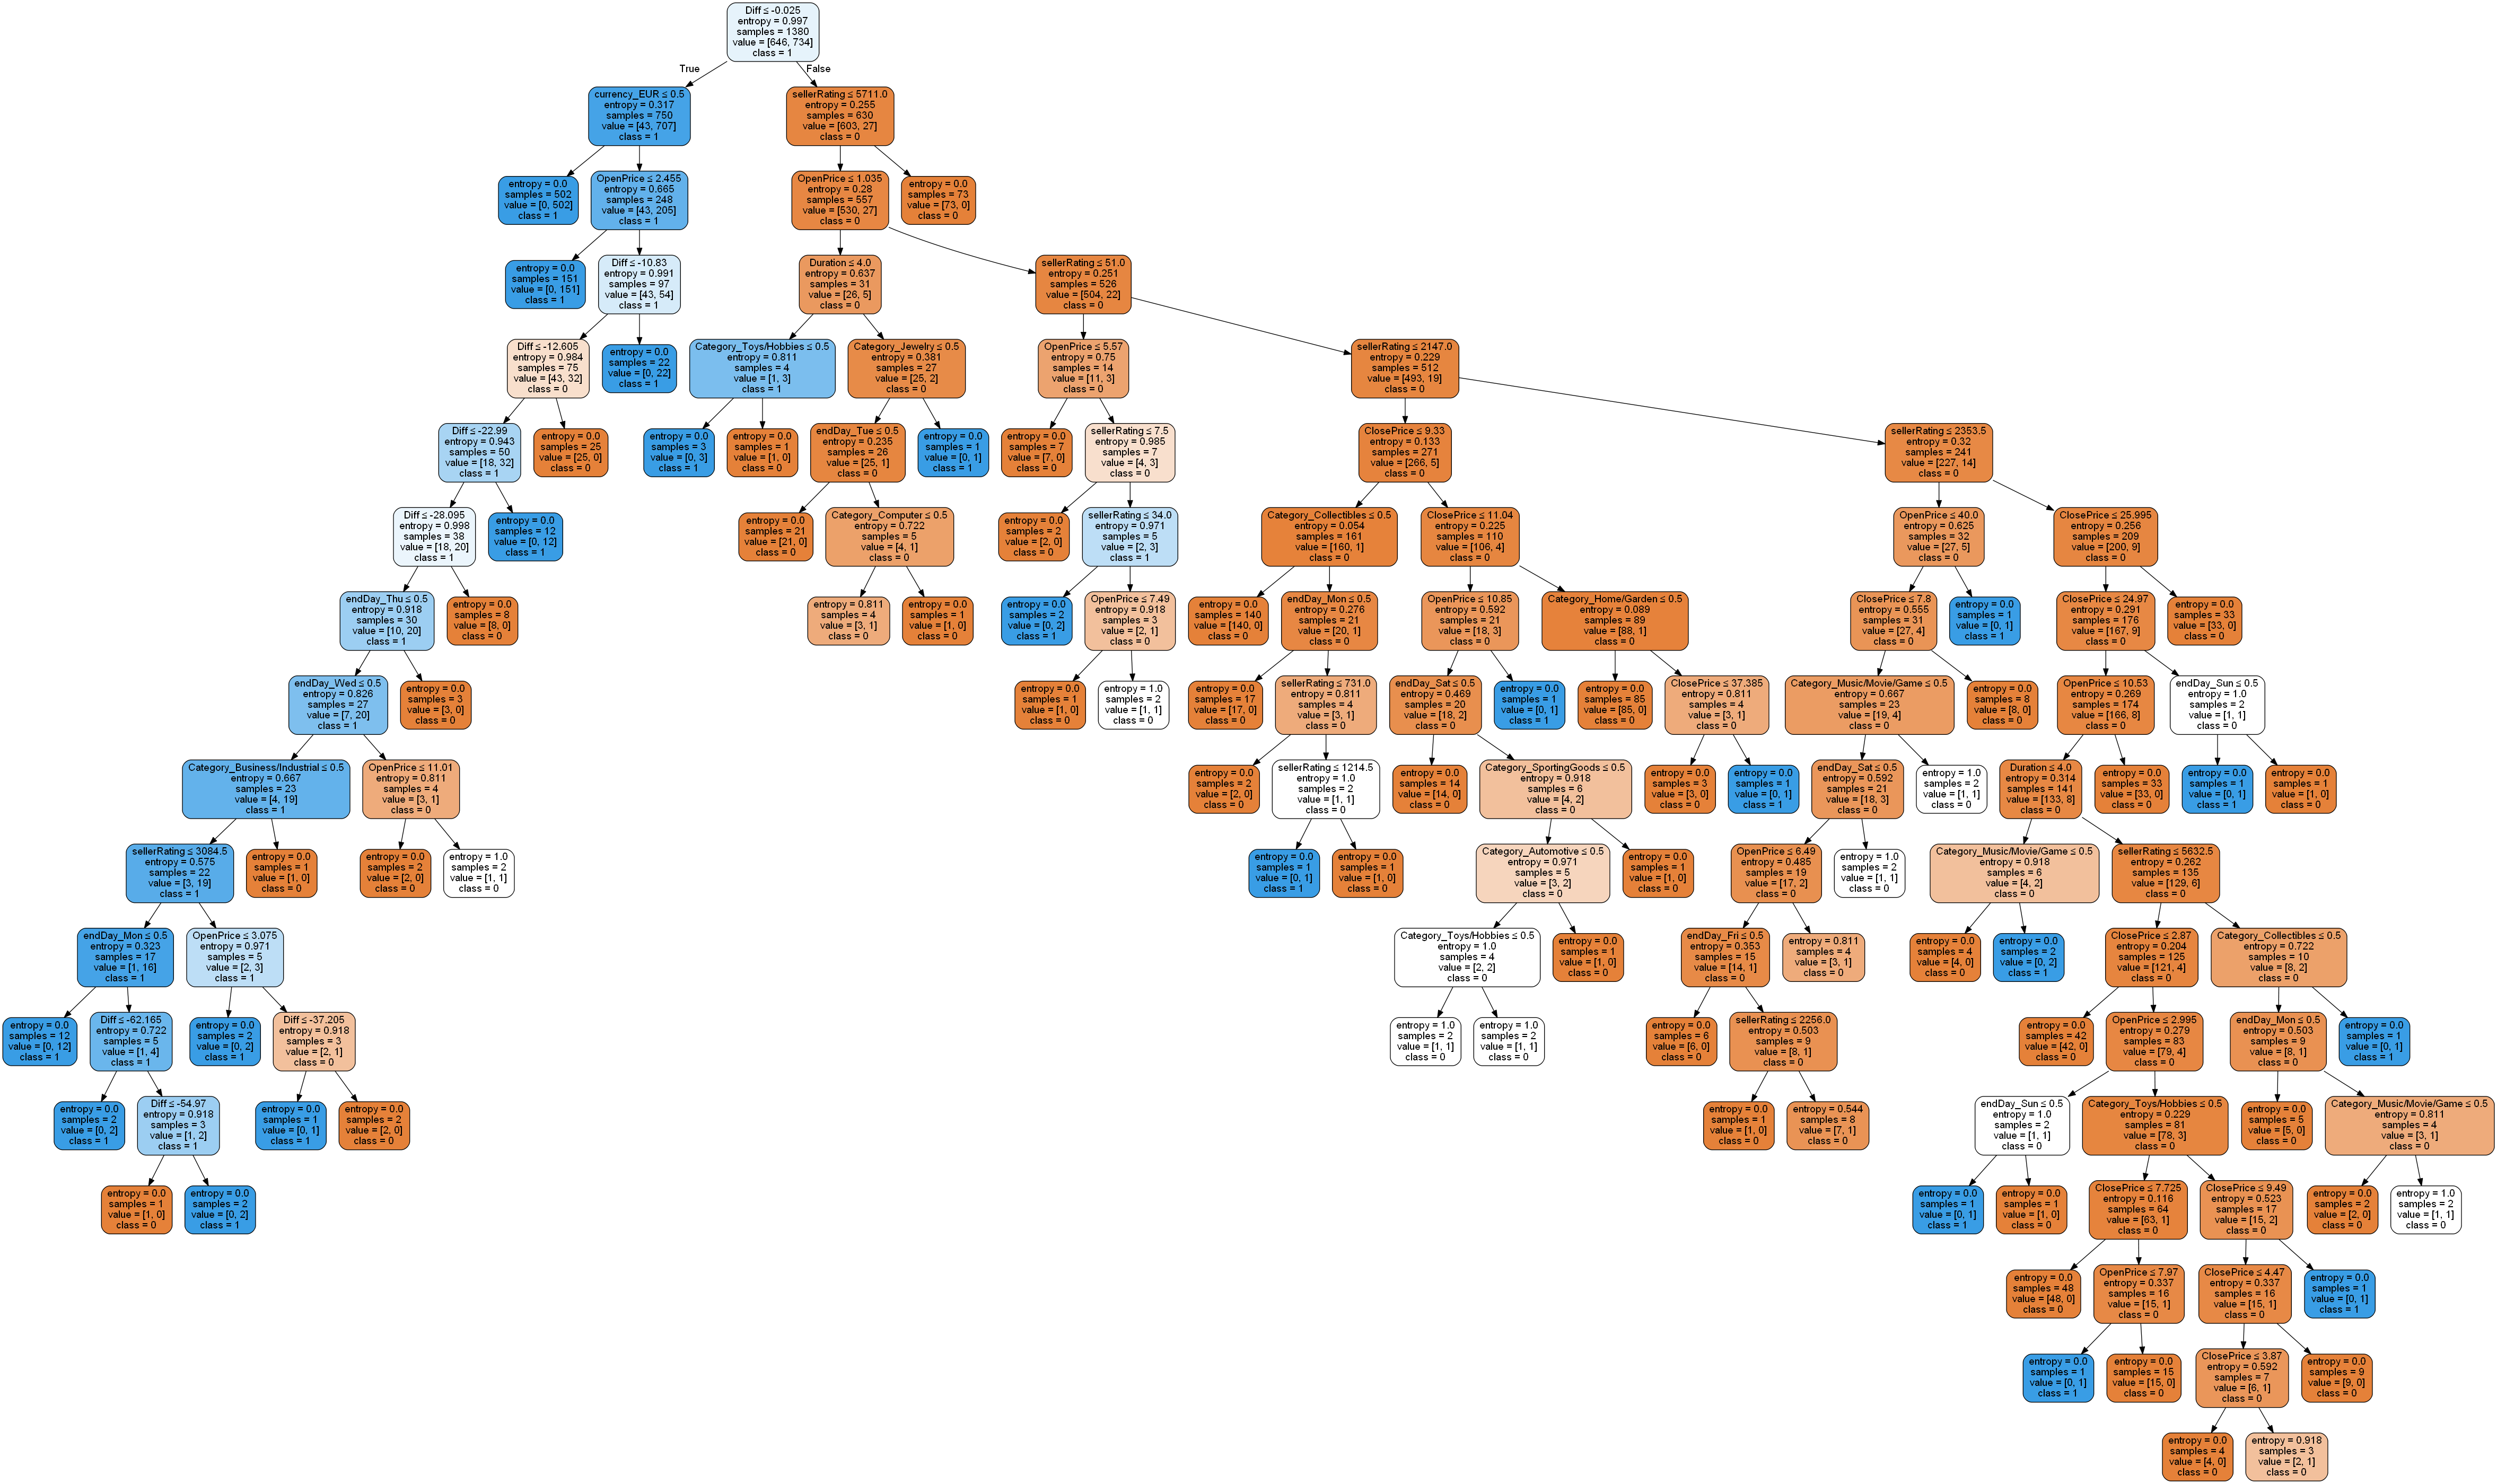

In [266]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_entropy.png')
Image(graph.create_png())

In [267]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

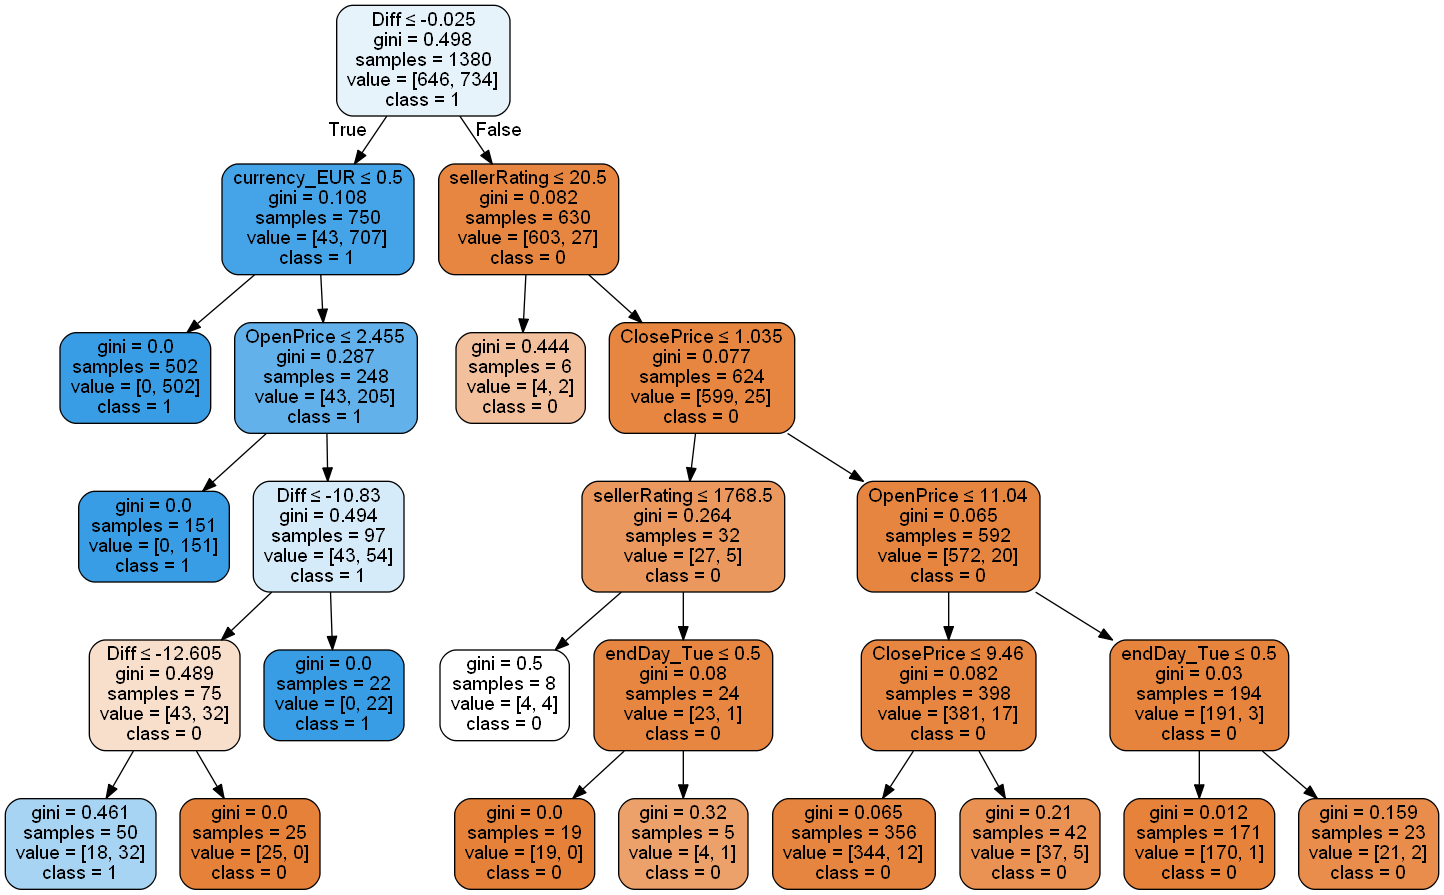

In [268]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_pruned.png')
Image(graph.create_png())

In [269]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [270]:
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)
print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[251   9]
 [ 11 321]]


In [271]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.9662162162162162
0.967391304347826


In [272]:
print(metrics.classification_report(y_test,preds_pruned))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96       260
          1       0.97      0.97      0.97       332

avg / total       0.97      0.97      0.97       592



In [273]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.00256745 0.         0.00105641 0.01696095 0.41976481 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00723234
 0.         0.         0.         0.         0.         0.
 0.         0.00042276 0.        ]


In [274]:
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(10)

,0
Diff,0.936965
OpenPrice,0.037859
currency_EUR,0.016143
sellerRating,0.005731
ClosePrice,0.002358
endDay_Tue,0.000944
currency_US,0.000000
Category_Pottery/Glass,0.000000
Category_SportingGoods,0.000000
Category_Toys/Hobbies,0.000000


In [275]:
clf_pruned.predict_proba(X_test)[0:10]

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.99415205, 0.00584795],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [276]:
y_pred_prob = clf_pruned.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([1.        , 1.        , 0.00584795, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.00584795,
       1.        , 0.03370787, 0.00584795, 0.03370787, 1.        ,
       1.        , 0.00584795, 0.00584795, 1.        ])

Text(0, 0.5, 'Frequency')

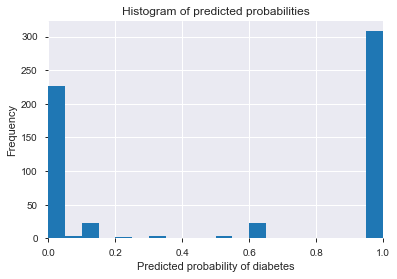

In [277]:
plt.hist(y_pred_prob, bins=20)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [278]:
pred_proba_df = pd.DataFrame(clf_pruned.predict_proba(X_test))
threshold_list = [0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.15,0.17,0.19,0.2,0.25,0.3,0.4,0.5,0.6,.7,.8,.9,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.92
[[218  42]
 [  8 324]]

******** For i = 0.06 ******
Our testing accuracy is 0.92
[[218  42]
 [  8 324]]

******** For i = 0.07 ******
Our testing accuracy is 0.92
[[218  42]
 [  8 324]]

******** For i = 0.08 ******
Our testing accuracy is 0.92
[[218  42]
 [  8 324]]

******** For i = 0.09 ******
Our testing accuracy is 0.92
[[222  38]
 [  8 324]]

******** For i = 0.1 ******
Our testing accuracy is 0.92
[[222  38]
 [  8 324]]

******** For i = 0.11 ******
Our testing accuracy is 0.92
[[222  38]
 [  8 324]]

******** For i = 0.12 ******
Our testing accuracy is 0.96
[[244  16]
 [  8 324]]

******** For i = 0.15 ******
Our testing accuracy is 0.96
[[244  16]
 [  8 324]]

******** For i = 0.17 ******
Our testing accuracy is 0.96
[[244  16]
 [  8 324]]

******** For i = 0.19 ******
Our testing accuracy is 0.96
[[244  16]
 [  8 324]]

******** For i = 0.2 ******
Our testing accuracy is 0.96
[[245  15]
 [  9 323]]

******** For i = 

In [279]:
plt.rcParams['font.size'] = 12

In [280]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [281]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [282]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [283]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 5}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       250        10
pos        11       321


In [284]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth
1,0.993,0.922,0.955,4
4,0.978,0.962,0.968,7
5,0.975,0.959,0.965,8
3,0.971,0.947,0.957,6
2,0.970,0.966,0.966,5
0,0.937,0.965,0.946,3


In [285]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]

In [286]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [287]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    

In [288]:
precision_recall_threshold(p, r, thresholds, 0.17)

     pred_neg  pred_pos
neg       250        10
pos        11       321


In [289]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

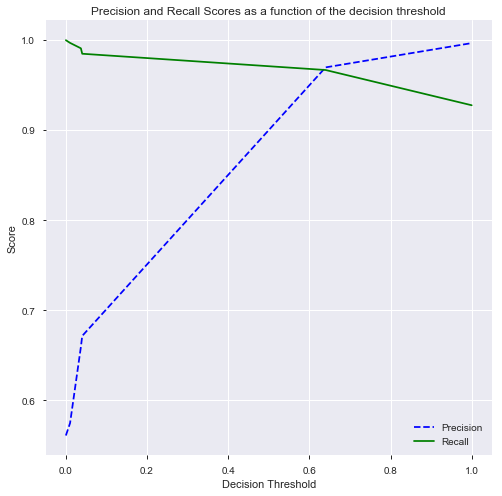

In [290]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [291]:
import pandas_profiling 
pandas_profiling.ProfileReport(df)

Number of variables,9
Number of observations,1972
Total Missing (%),0.0%
Total size in memory,138.7 KiB
Average record size in memory,72.0 B
Numeric,5
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,0
